In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk

In [2]:
# Load the dataset
df = pd.read_csv('data/titanic.csv')

In [3]:
# Display the first few rows of the df
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Gender   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Display the info of the df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB
None


In [5]:
# Description of the df
print(df.describe())

       PassengerId     Survived       Pclass          Age        SibSp  \
count  1309.000000  1309.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000     0.377387     2.294882    29.881138     0.498854   
std     378.020061     0.484918     0.837836    14.413493     1.041658   
min       1.000000     0.000000     1.000000     0.170000     0.000000   
25%     328.000000     0.000000     2.000000    21.000000     0.000000   
50%     655.000000     0.000000     3.000000    28.000000     0.000000   
75%     982.000000     1.000000     3.000000    39.000000     1.000000   
max    1309.000000     1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200  


In [6]:
# Display missing values
print(df.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Gender            0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [7]:
# Fill missing 'Age' values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)


In [8]:
# Fill missing 'Embarked' values with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [9]:
# Drop 'Cabin' column due to a high number of missing values
df.drop(columns=['Cabin'], inplace=True)

In [10]:
# Convert 'Gender' column to numeric values: male -> 1, female -> 0
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})

In [11]:
# Fill missing 'Fare' values with the mode
df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)

In [12]:
# Display the dataframe after cleaning
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Gender   Age  SibSp  \
0                            Braund, Mr. Owen Harris       1  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       0  38.0      1   
2                             Heikkinen, Miss. Laina       0  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       0  35.0      1   
4                           Allen, Mr. William Henry       1  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


In [13]:
# Check missing values again
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [14]:
# Create a new feature 'FamilySize' which is the sum of 'SibSp' and 'Parch' plus one
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create a new feature 'IsAlone' which indicates if a passenger is alone or not
df['IsAlone'] = 1  # Initialize to 1
df['IsAlone'].loc[df['FamilySize'] > 1] = 0  # Set to 0 if FamilySize is greater than 1

/var/folders/5d/v4623g510hs5f3dknp9j4g2r0000gp/T/ipykernel_2569/766033829.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsAlone'].loc[df['FamilySize'] > 1] = 0  # Set to 0 if FamilySize is greater than 1


In [15]:
# Display the dataframe with new features
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Gender   Age  SibSp  \
0                            Braund, Mr. Owen Harris       1  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       0  38.0      1   
2                             Heikkinen, Miss. Laina       0  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       0  35.0      1   
4                           Allen, Mr. William Henry       1  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  IsAlone  
0      0         A/5 21171   7.2500        S           2        0  
1      0          PC 17599  71.2833        C           2        0  
2      0  STON/O2. 3101282   7.9250        S           1        1  
3      0            113803  53.1000        S    

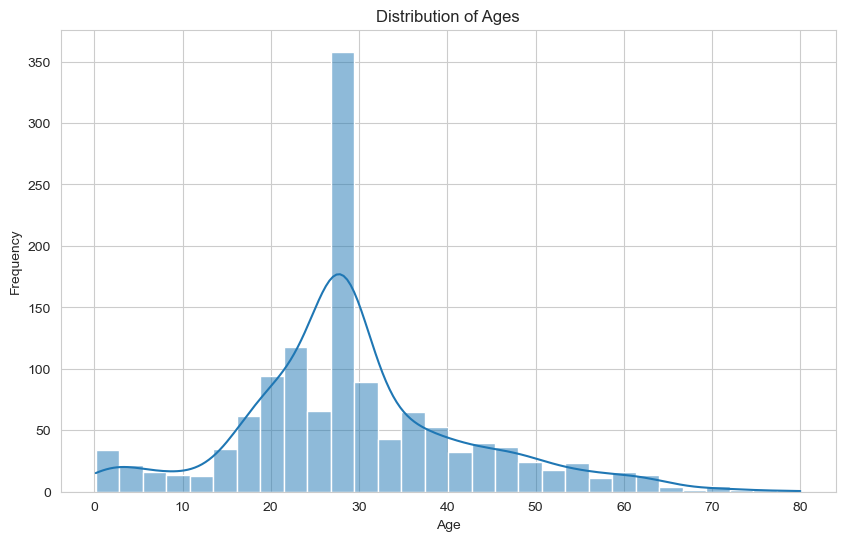

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


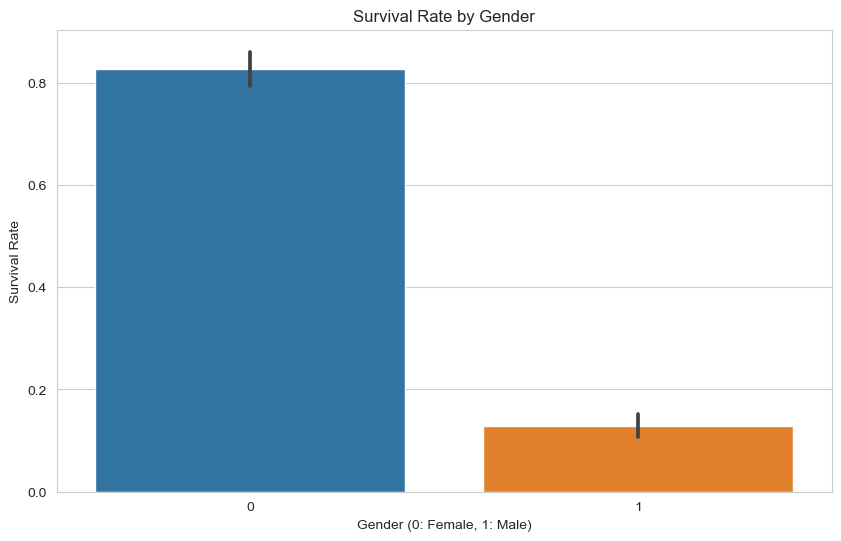

In [17]:
# Plot the survival rate by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Survival Rate')
plt.show()

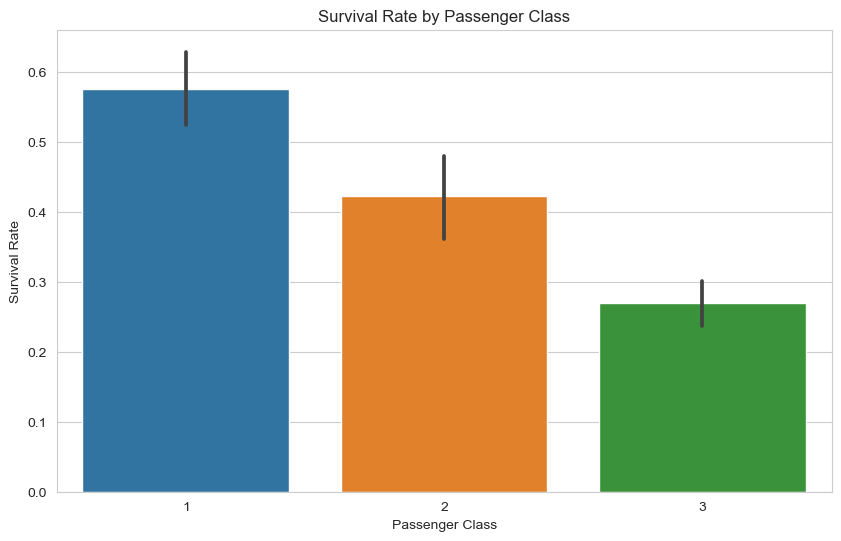

In [18]:
# Survival Rate by Passenger Class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

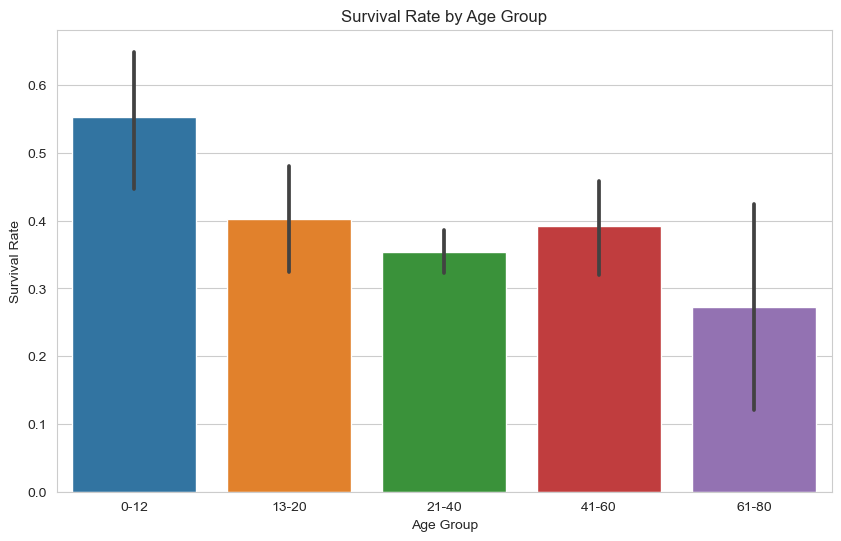

In [19]:
# Survival Rate by Age Group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['0-12', '13-20', '21-40', '41-60', '61-80'])
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

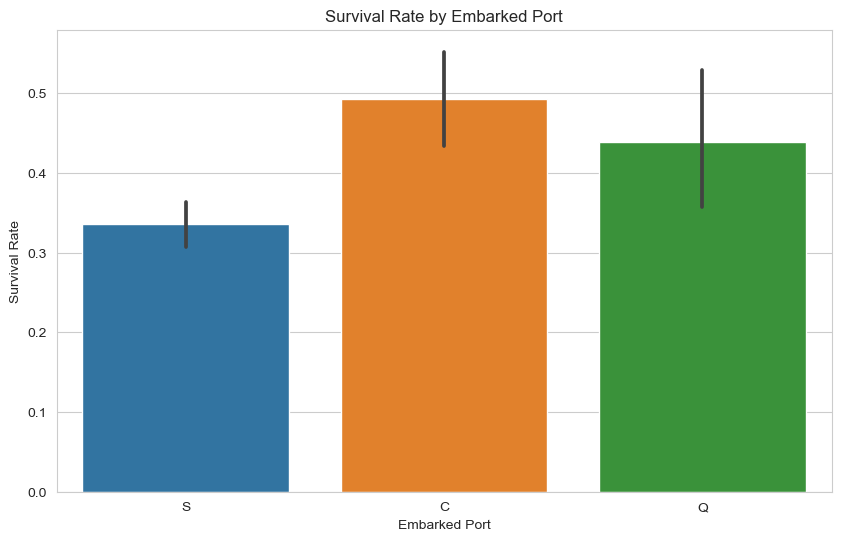

In [20]:
# Survival Rate by Embarked Port
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.show()

/var/folders/5d/v4623g510hs5f3dknp9j4g2r0000gp/T/ipykernel_2569/3719770495.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


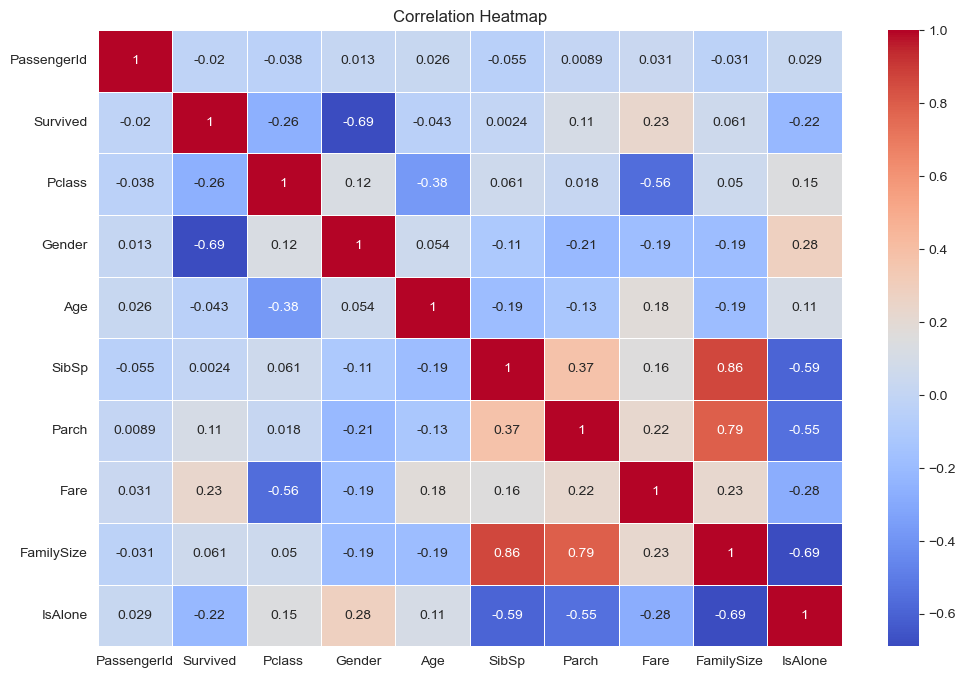

In [21]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

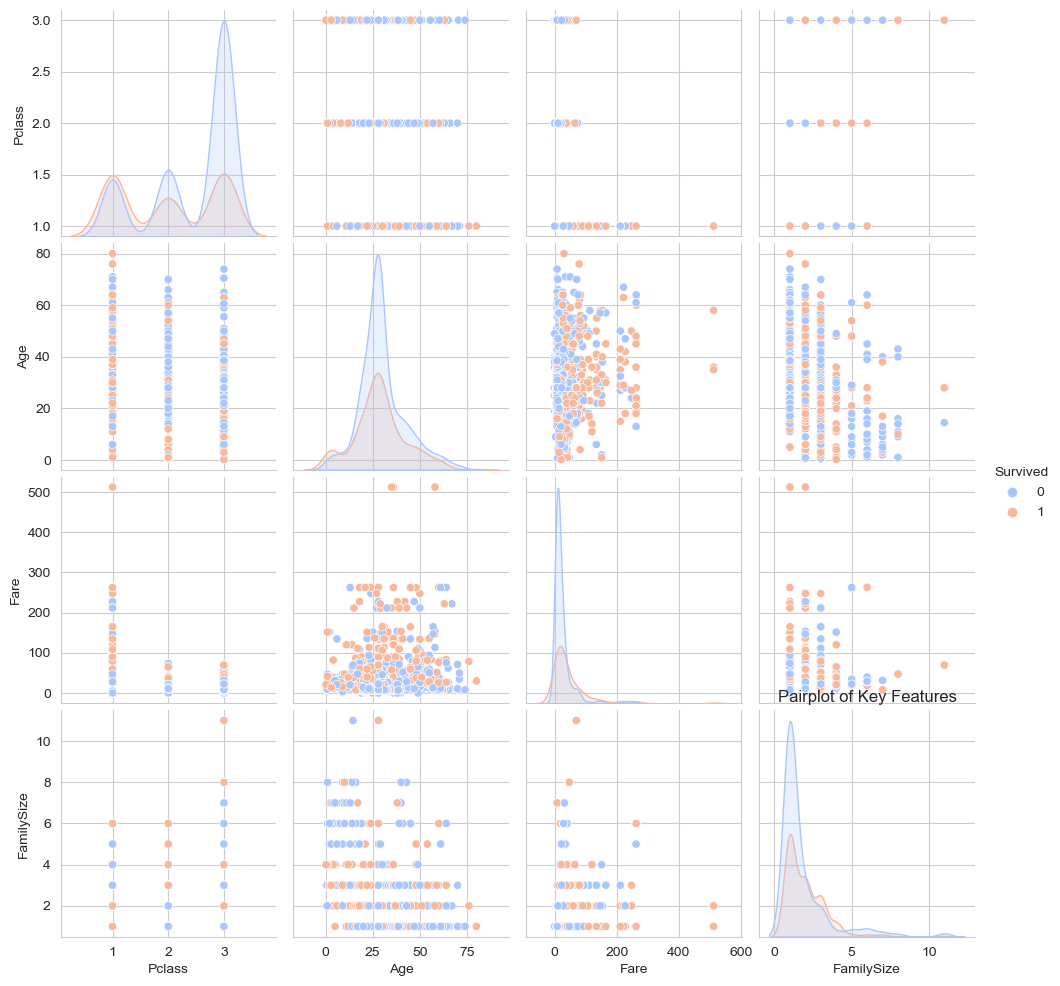

In [22]:
# Pairplot of Key Features
sns.pairplot(df[['Pclass', 'Age', 'Fare', 'FamilySize', 'Survived']], hue='Survived', palette='coolwarm')
plt.title('Pairplot of Key Features')
plt.show()

When creating a classification model using the Titanic dataset, it's essential to select features that are likely to have predictive power regarding the target variable, which in this case is Survived. Below are some recommended features to consider:
* Pclass (Passenger Class): Socioeconomic status might influence survival.
* Gender: Gender is a critical factor as women and children were given priority during evacuation.
* Age: Age groups might have different survival rates.
* Fare: Ticket fare can be an indicator of socioeconomic status.
* Embarked: The port of embarkation might reflect regional differences in survival rates
* FamilySize: Number of family members on board might influence the likelihood of survival
* IsAlone: Whether the passenger was alone or with family might impact survival.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
# Create a new feature AgeGroup
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['0-12', '13-20', '21-40', '41-60', '61-80'])

# Convert categorical features into numerical codes
df['AgeGroup'] = df['AgeGroup'].astype('category').cat.codes

df['Embarked'] = df['Embarked'].astype('category').cat.codes


In [25]:
# Select features and target
features = ['Pclass', 'Gender', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
X = df[features]
y = df['Survived']

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape, y_train.shape

((1047, 7), (1047,))

In [28]:
X_test.shape, y_test.shape

((262, 7), (262,))

In [29]:
# Normalize
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [30]:
# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_normalized, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Predict on test set
y_pred = model.predict(X_test_normalized)

In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       159
           1       0.76      0.79      0.78       103

    accuracy                           0.82       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262



<Figure size 1000x700 with 0 Axes>

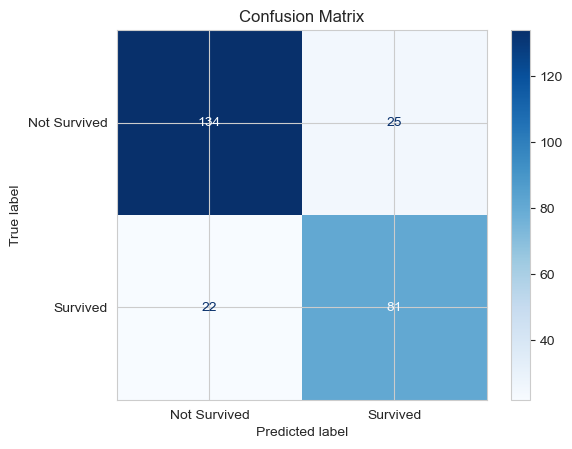

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Not Survived', 'Survived'])

# Plot confusion matrix
plt.figure(figsize=(10, 7))
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

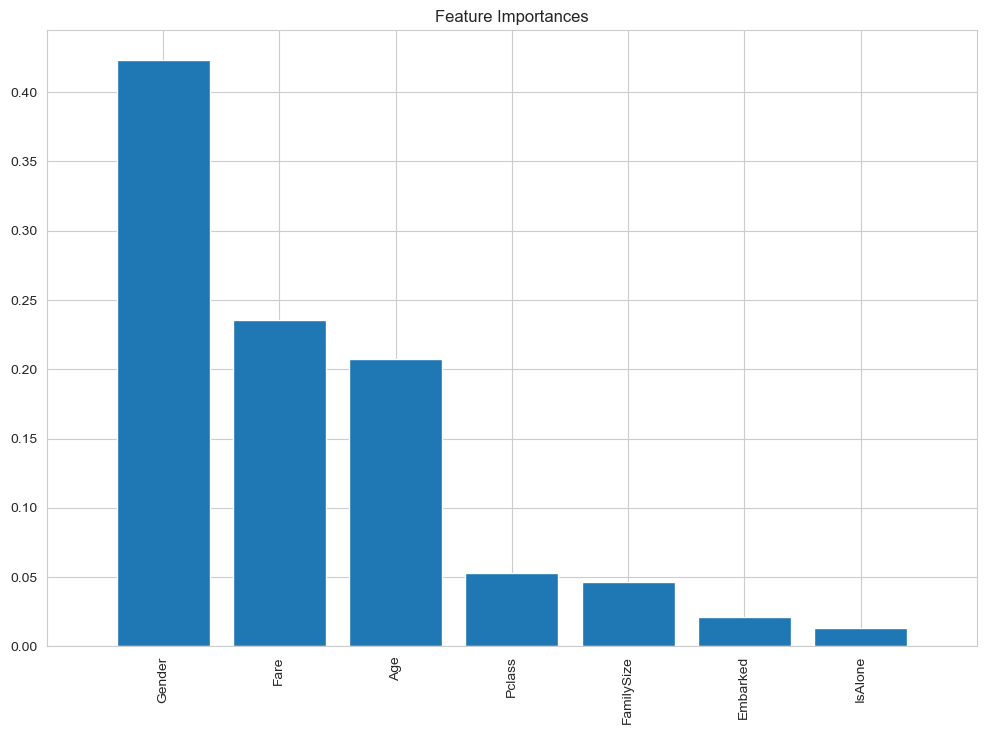

In [34]:
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()